In [1]:
import pandas as pd
import numpy as np
df_orig = pd.read_csv(r"data\2016_important\whole_data.csv", low_memory = False)
# dataframe2 = pd.read_csv(r"data\2016_important\2016_final_text.csv", low_memory = False)
# dataframe2.columns
df_2016 = df_orig.copy()

FileNotFoundError: [Errno 2] No such file or directory: 'data\\2016_important\\whole_data.csv'

In [212]:
df_2016["Period"] = df_2016["Period"].apply(lambda val : val.strip())

df_2016["QE_Tutor"] = df_2016["SD_Tutor"].apply(lambda x : int(x=="QE")*"x").replace("", np.NaN)
df_2016["QE_Tutee"] = df_2016["SD_Tutee"].apply(lambda x : int(x=="QE")*"x").replace("", np.NaN)
df_2016["SD_Tutor"] = df_2016["SD_Tutor"].apply(lambda x : int(x=="SD")*"x").replace("", np.NaN)
df_2016["SD_Tutee"] = df_2016["SD_Tutee"].apply(lambda x : int(x=="SD")*"x").replace("", np.NaN)

df_2016["PR_Tutor"] = df_2016["PR_Tutor"].apply(lambda x : int(x in ['0','UL','LPA','LP','LPP','not sure if this is praise'])*"x").replace("", np.NaN)
df_2016["PR_Tutee"] = df_2016["PR_Tutee"].apply(lambda x : int(x in ['0','UL','LPA','LP','LPP','not sure if this is praise'])*"x").replace("", np.NaN)

df_2016["SV_Tutor"] = df_2016["SV_Tutor"].apply(lambda x : int(x=="SV")*"x").replace("", np.NaN)
df_2016["SV_Tutee"] = df_2016["SV_Tutee"].apply(lambda x : int(x=="SV")*"x").replace("", np.NaN)

In [222]:
# Counting the number of each CS to make sure nothing gets lost in modifications --------------------------------
# for cs_ in cs_list:
#     print(df_2016[cs_].count(), df_orig[cs_].count())
#     print(df_2016[cs_].unique(), df_orig[cs_].unique())

# print(df_2016['QE_Tutor'].count(), df_2016['QE_Tutee'].count())
# ---------------------------------------------------------------------------------------------------------------

df_2016["Duration"] = (pd.to_datetime(df_2016["Time_end"], format="%H:%M:%S") - pd.to_datetime(df_2016["Time_begin"], format="%H:%M:%S")).apply(lambda val : str(val).split()[-1])
df_2016["Duration_s"] = df_2016["Duration"].apply(lambda val : min(12.0, 60 * float(val.split(":")[-2]) + float(val.split(":")[-1])))

In [230]:
df_2016 = df_2016[["Dyad", "Session", "Period", "Time_begin","Time_end","Duration","P1","P2","SV_Tutor","SV_Tutee","PR_Tutor","PR_Tutee","SD_Tutor","SD_Tutee","QE_Tutor","QE_Tutee","Duration_s"]]

In [235]:
# df_2016.to_csv("2016_final_cs.csv", index = False)

df_2016_txt = df_2016[~(pd.isna(df_2016["P1"])) | ~(pd.isna(df_2016["P2"]))]

In [236]:
df_2016_txt.to_csv("2016_text_only.csv", index = False)

In [241]:
cs_list = ['SV_Tutor','SV_Tutee','PR_Tutor','PR_Tutee','SD_Tutor','SD_Tutee' ,'QE_Tutor','QE_Tutee']
for cs_ in cs_list:
    print(df_2016_txt[cs_].count() / len(df_2016_txt))

0.05981318331387326
0.05917630824753211
0.003927396242437108
0.0020167710434136504
0.017567137246576797
0.021600679333404097
0.003980469164632205
0.004670417153168453


In [249]:
import pandas as pd
import numpy as np

df = pd.read_csv("data/2016_important/RAPT_HH_Skype_masterTranscript_annotated_edited_10-20-17_MM.csv", encoding="cp1252")

df["Tutor"], df["Tutee"] = pd.Series(), pd.Series()

In [254]:
['dyad','session','participant','timestamp','AU01_r','AU02_r','AU04_r','AU05_r','AU06_r','AU07_r','AU09_r','AU10_r','AU12_r','AU14_r','AU15_r','AU17_r','AU20_r','AU23_r','AU25_r','AU26_r','AU45_r']

Index(['Dyad', 'Session', 'Period', 'Problem', 'Correctness', 'Rapport Level',
       'Time_begin', 'Time_end', 'P1', 'P2', 'DQ_Tutor', 'DQ_Tutee',
       'SQ_Tutor', 'SQ_Tutee', 'KB_Tutor', 'KB_Tutee', 'KT_Tutor', 'KT_Tutee',
       'MC_Tutor', 'MC_Tutee', 'PR_Tutor', 'PR_Tutee', 'SD_Tutor', 'SD_Tutee'],
      dtype='object')

In [ ]:
df = df["Dyad", "Session", ]

In [79]:
dict(zip(["VSN", "PR", "SD", "QE", "None"], np.sum(labels.values, axis = 0) / len(labels))).values()

dict_values([0.0367777841528487, 0.016524183831545126, 0.003901543404670377, 0.004073670319582306, 0.8781341442423547])

In [252]:
df

,Dyad,Session,Period,Problem,Correctness,Rapport Level,Time_begin,Time_end,P1,P2,...,KB_Tutor,KB_Tutee,KT_Tutor,KT_Tutee,MC_Tutor,MC_Tutee,PR_Tutor,PR_Tutee,SD_Tutor,SD_Tutee
0,10,1,S1,NaN,NaN,4,01:15.3,07:08.4,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,10,1,S1,NaN,NaN,Na,01:16.9,01:17.9,NaN,I know right,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,10,1,S1,NaN,NaN,Na,01:17.9,01:20.6,NaN,they like telling me how computers never worked,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,10,1,S1,NaN,NaN,Na,01:20.6,01:22.8,NaN,I'm like I'm in cyber school I know that,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,10,1,S1,NaN,NaN,Na,01:22.8,01:24.2,NaN,I know that by now,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19665,9,2,T2,9,0.0,5,56:21.5,56:25.2,I do not have that many,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
19666,9,2,T2,9,0.0,5,56:25.4,56:26.5,NaN,wait where did they go,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
19667,9,2,T2,9,0.0,5,56:26.6,56:31.3,exit I clicked turn the page (laughter),NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
19668,9,2,T2,9,0.0,5,56:36.0,56:36.1,mm-hmm,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [30]:
from sklearn.utils.class_weight import compute_sample_weight

a = compute_sample_weight(class_weight = 'balanced', y = np.reshape(labels.astype(int).values, (5, -1)))

In [ ]:
import torch
torch.manual_seed(12061999)

train_data, test_data, val_data = torch.utils.data.random_split(
    dataframe2,
    [
        int(len(dataframe2) * 0.75),
        int(len(dataframe2) * 0.125),
        len(dataframe2)
        - int(len(dataframe2) * 0.75)
        - int(len(dataframe2) * 0.125),
    ],
)

In [110]:
type(train_data)

torch.utils.data.dataset.Subset

In [96]:
for df_ in [train_data, test_data, val_data]:
    t_d = {}
    for l_ in ['SV_Tutor', 'SV_Tutee', 'PR_Tutor', 'PR_Tutee', 'SD_Tutor', 'SD_Tutee', 'QE_Tutor', 'QE_Tutee']:
        t_d[l_[:2]] = 0

    for i, l_ in enumerate(['SV_Tutor', 'SV_Tutee', 'PR_Tutor', 'PR_Tutee', 'SD_Tutor', 'SD_Tutee', 'QE_Tutor', 'QE_Tutee']):
        count = len(df_[~(pd.isna(df_[l_]))])
        t_d[l_[:2]]+= count
    print(t_d)

TypeError: list indices must be integers or slices, not str

In [39]:
dataframe2 = dataframe2[['Dyad', 'P1', 'P2', 'SV_Tutor', 'SV_Tutee', 'PR_Tutor', 'PR_Tutee', 'SD_Tutor',
       'SD_Tutee', 'QE_Tutor', 'QE_Tutee']]

dataframe2 = dataframe2[(~(pd.isna(dataframe2.P1))) | (~(pd.isna(dataframe2.P2)))]

In [56]:
test = dataframe2[['SV_Tutor','SV_Tutee','PR_Tutor','PR_Tutee','SD_Tutor','SD_Tutee','QE_Tutor','QE_Tutee']].isna()

In [82]:
import numpy as np
lol = test2.isna().all(axis = "columns").replace(True, "x").replace(False, np.nan)

In [84]:
lol[lol!="x"]

15       NaN
42       NaN
57       NaN
58       NaN
59       NaN
        ... 
16612    NaN
16713    NaN
16956    NaN
17107    NaN
17348    NaN
Length: 2124, dtype: object

In [88]:
dir(traindata)

['Duration',
 'Duration_s',
 'Dyad',
 'Gaze_Elsewhere_Tutee',
 'Gaze_Elsewhere_Tutor',
 'Gaze_Partner_Tutee',
 'Gaze_Partner_Tutor',
 'Gaze_Worksheet_Tutee',
 'Gaze_Worksheet_Tutor',
 'None',
 'P1',
 'P2',
 'PR',
 'PR_Tutee',
 'PR_Tutor',
 'Period',
 'QE',
 'QE_Tutee',
 'QE_Tutor',
 'SD',
 'SD_Tutee',
 'SD_Tutor',
 'SV_Tutee',
 'SV_Tutor',
 'Session',
 'Smile_Tutee',
 'Smile_Tutor',
 'T',
 'Time_begin',
 'Time_end',
 'VSN',
 '_AXIS_LEN',
 '_AXIS_ORDERS',
 '_AXIS_REVERSED',
 '_AXIS_TO_AXIS_NUMBER',
 '_HANDLED_TYPES',
 '__abs__',
 '__add__',
 '__and__',
 '__annotations__',
 '__array__',
 '__array_priority__',
 '__array_ufunc__',
 '__array_wrap__',
 '__bool__',
 '__class__',
 '__contains__',
 '__copy__',
 '__deepcopy__',
 '__delattr__',
 '__delitem__',
 '__dict__',
 '__dir__',
 '__divmod__',
 '__doc__',
 '__eq__',
 '__finalize__',
 '__floordiv__',
 '__format__',
 '__ge__',
 '__getattr__',
 '__getattribute__',
 '__getitem__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__iadd__',
 '__iand__

In [40]:
testcol = dataframe2[(~(pd.isna(dataframe2.SD_Tutor))) | (~(pd.isna(dataframe2.SD_Tutee)))]["Dyad"]
count_dict = {}
for dyad_ in testcol.unique():
    count_dict[dyad_] = len(testcol[testcol == dyad_])

In [41]:
count_dict

{3: 83,
 4: 14,
 5: 61,
 6: 96,
 7: 53,
 8: 15,
 9: 47,
 10: 103,
 11: 55,
 12: 77,
 15: 22,
 16: 15,
 17: 3}

In [2]:
aus_df = dataframe[[' AU01_r', ' AU02_r', ' AU04_r', ' AU05_r',
       ' AU06_r', ' AU07_r', ' AU09_r', ' AU10_r', ' AU12_r', ' AU14_r',
       ' AU15_r', ' AU17_r', ' AU20_r', ' AU23_r', ' AU25_r', ' AU26_r',
       ' AU45_r']]

In [28]:
test_aus = aus_df[15:19]
print(test_aus)
tensor_aus = torch.transpose(torch.tensor(test_aus.values), 0, 1)

import numpy as np
import torch
import torch.nn.functional as F



     AU01_r   AU02_r   AU04_r   AU05_r   AU06_r   AU07_r   AU09_r   AU10_r  \
15     1.41     0.98     0.96     0.30     0.00      0.0     0.00     0.00   
16     1.99     0.00     1.25     1.26     0.84      0.0     1.30     2.39   
17     0.00     0.00     0.00     0.00     0.00      0.0     0.00     0.00   
18     0.00     0.00     0.86     0.00     1.12      0.0     0.45     3.58   

     AU12_r   AU14_r   AU15_r   AU17_r   AU20_r   AU23_r   AU25_r   AU26_r  \
15     0.00     0.00     0.00     0.99     0.00     0.00     2.20     0.00   
16     1.35     0.33     0.00     3.09     1.15     0.60     1.34     0.00   
17     0.00     0.00     0.00     0.00     0.00     0.00     0.00     0.00   
18     2.92     1.85     1.76     1.95     0.00     0.56     1.57     0.03   

     AU45_r  
15      0.0  
16      0.0  
17      0.0  
18      0.0  


In [29]:
aus = F.pad(
                    torch.tensor(np.array([aus_row.values for _, aus_row in test_aus.iterrows()])),
                (0, 0, 0, 24 - len(test_aus)),
        )
aus

tensor([[1.4100, 0.9800, 0.9600, 0.3000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.9900, 0.0000, 0.0000, 2.2000, 0.0000, 0.0000],
        [1.9900, 0.0000, 1.2500, 1.2600, 0.8400, 0.0000, 1.3000, 2.3900, 1.3500,
         0.3300, 0.0000, 3.0900, 1.1500, 0.6000, 1.3400, 0.0000, 0.0000],
        [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000],
        [0.0000, 0.0000, 0.8600, 0.0000, 1.1200, 0.0000, 0.4500, 3.5800, 2.9200,
         1.8500, 1.7600, 1.9500, 0.0000, 0.5600, 1.5700, 0.0300, 0.0000],
        [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000],
        [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000],
        [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.000

In [100]:
import pandas as pd
import matplotlib.pyplot as plt

df_2016 = pd.read_csv("data/2016_important/dyads_1_9_5perc_samples.csv")[['Dyad','Session','Period','Time_begin','Time_end','Duration','P1','P2','Duration_s','Time_begin_true','Time_end_true','Video']]

ts_list = ['Time_begin', 'Time_end', 'Time_begin_true', 'Time_end_true']

for col_ in ts_list:
    df_2016[col_] = pd.to_datetime(df_2016[col_])

df_2016["Duration"] = pd.to_datetime(df_2016["Duration"]).dt.second

df_2016["Time_begin_offset"] = df_2016["Time_begin"].dt.second - df_2016["Time_begin_true"].dt.second + 60 * (df_2016["Time_begin"].dt.minute - df_2016["Time_begin_true"].dt.minute)
df_2016["Time_end_offset"] = df_2016["Time_end"].dt.second - df_2016["Time_end_true"].dt.second + 60 * (df_2016["Time_end"].dt.minute - df_2016["Time_end_true"].dt.minute)
df_2016["Duration_true"] = df_2016["Time_end_true"].dt.second - df_2016["Time_begin_true"].dt.second + 60 * (df_2016["Time_end_true"].dt.minute - df_2016["Time_begin_true"].dt.minute)
df_2016["Duration_error"] = df_2016["Duration"] - df_2016["Duration_true"]

print(len(df_2016["Dyad"].unique()))

#Set up figure
fig, ax = plt.subplots(2, 4, figsize=(11,5), constrained_layout=True)
# plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=0.3, hspace=None) #Adjust space between graphs

dyad_dict = dict(zip(df_2016["Dyad"].unique(), [{} for _ in range(8)]))

for dyad_, ax_  in zip(df_2016["Dyad"].dropna().unique(), ax.flat):
    if dyad_==0:continue
    curr_df_ = df_2016[df_2016["Dyad"] == dyad_]
    first_ts = list(curr_df_["Time_begin_true"])[0]
    last_ts = list(curr_df_["Time_end_true"])[-1]
    # x_axis = pd.date_range(first_ts, last_ts)
    # y_axis1 = curr_df_["Duration_error"]
    # y_axis2 = curr_df_["Time_begin_offset"]
    # y_axis3 = curr_df_["Time_end_offset"]
    ax_.bar(curr_df_["Time_begin_true"], curr_df_["Duration_error"], width = 0.0008, color = "red", alpha = .0)
    ax_.bar(curr_df_["Time_begin_true"], curr_df_["Time_begin_offset"], width = 0.0008, color = "blue", alpha = .5)
    ax_.bar(curr_df_["Time_begin_true"], curr_df_["Time_end_offset"], width = 0.0008, color = "green", alpha = .5)
    title_ = "Dyad {}".format(int(dyad_))
    ax_.set_title(title_)

8


In [102]:
df_2016["Dyad"].unique()

array([ 3.,  4.,  5.,  6.,  7.,  8.,  9., nan])

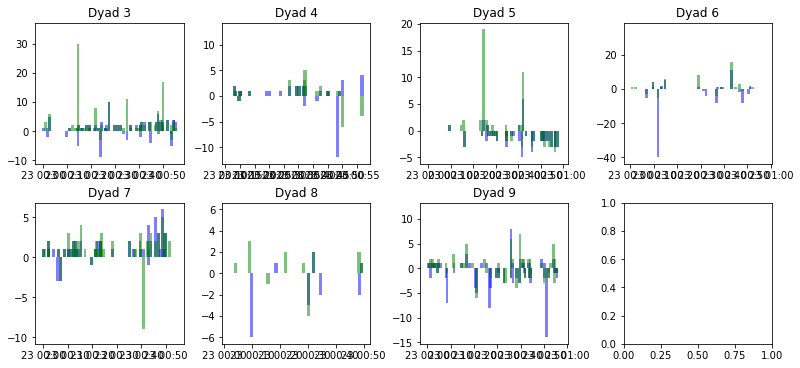

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

df_2016 = pd.read_csv("data/2016_important/2016_text_only.csv")
df_2016 = df_2016[(df_2016["Dyad"] <= 11) & (df_2016["Dyad"] >= 3)]
df_2016 = df_2016[~((df_2016["Dyad"] == 8) & (df_2016["Session"] == 1))]
df_main = df_2016[~((df_2016["Dyad"] == 11) & (df_2016["Session"] == 2))]

df_main["VSN"] = df_main[['SV_Tutor', 'SV_Tutee']].apply(lambda row : np.sum(row.astype(str)), axis = 1).replace('xnan', "x").replace("nanx", 'x').replace('xx', 'x').replace("nannan", "")
df_main["PR"] = df_main[['PR_Tutor', 'PR_Tutee']].apply(lambda row : np.sum(row.astype(str)), axis = 1).replace('xnan', "x").replace("nanx", 'x').replace('xx', 'x').replace("nannan", "")
df_main["SD"] = df_main[['SD_Tutor', 'SD_Tutee']].apply(lambda row : np.sum(row.astype(str)), axis = 1).replace('xnan', "x").replace("nanx", 'x').replace('xx', 'x').replace("nannan", "")
df_main["QE"] = df_main[['QE_Tutor', 'QE_Tutee']].apply(lambda row : np.sum(row.astype(str)), axis = 1).replace('xnan', "x").replace("nanx", 'x').replace('xx', 'x').replace("nannan", "")
df_main["None"] = df_main[['PR_Tutor','PR_Tutee','SD_Tutor','SD_Tutee','QE_Tutor','QE_Tutee']].isna().all(axis = "columns").replace(True, "x").replace(False, "").replace("nannan", "") #'SV_Tutor','SV_Tutee',

df_main = df_main.drop(columns = ['SV_Tutor','SV_Tutee','PR_Tutor','PR_Tutee','SD_Tutor','SD_Tutee','QE_Tutor','QE_Tutee'])

class_list = ["VSN", "PR", "SD", "QE", "None"]
for c_ in class_list:
    for d_ in df_main["Dyad"].unique():
        print(f" class {c_} Dyad {d_}")
        print(len(df_main[(df_main[c_]=='x') & (df_main["Dyad"] == d_)]))

c:\Users\Alafate\anaconda3\envs\EwenPyTorchnfriends\lib\site-packages\ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.
c:\Users\Alafate\anaconda3\envs\EwenPyTorchnfriends\lib\site-packages\ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # This is added back by InteractiveShellApp.init_path()
c:\Users\Alafate\anaconda3\envs\EwenPyTorchnfriends\lib\site-packages\ipykernel_launcher.py:12: SettingWithCopyWarning: 

 class VSN Dyad 10
153
 class VSN Dyad 11
39
 class VSN Dyad 3
35
 class VSN Dyad 4
33
 class VSN Dyad 5
239
 class VSN Dyad 6
339
 class VSN Dyad 7
510
 class VSN Dyad 8
0
 class VSN Dyad 9
282
 class PR Dyad 10
15
 class PR Dyad 11
10
 class PR Dyad 3
16
 class PR Dyad 4
3
 class PR Dyad 5
10
 class PR Dyad 6
9
 class PR Dyad 7
3
 class PR Dyad 8
5
 class PR Dyad 9
3
 class SD Dyad 10
103
 class SD Dyad 11
40
 class SD Dyad 3
83
 class SD Dyad 4
14
 class SD Dyad 5
61
 class SD Dyad 6
96
 class SD Dyad 7
53
 class SD Dyad 8
7
 class SD Dyad 9
134
 class QE Dyad 10
14
 class QE Dyad 11
12
 class QE Dyad 3
27
 class QE Dyad 4
0
 class QE Dyad 5
12
 class QE Dyad 6
13
 class QE Dyad 7
18
 class QE Dyad 8
0
 class QE Dyad 9
13
 class None Dyad 10
1520
 class None Dyad 11
831
 class None Dyad 3
1431
 class None Dyad 4
798
 class None Dyad 5
1694
 class None Dyad 6
1400
 class None Dyad 7
1633
 class None Dyad 8
454
 class None Dyad 9
1549


c:\Users\Alafate\anaconda3\envs\EwenPyTorchnfriends\lib\site-packages\ipykernel_launcher.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  del sys.path[0]
c:\Users\Alafate\anaconda3\envs\EwenPyTorchnfriends\lib\site-packages\ipykernel_launcher.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
